Zusammenhang zwischen PM25-Werten und Wetter

erst mal NUR in Atlanta, dann in Hamburg


Update: Das NB könnte auch in "Feature Engineering" umbenannt werden. Oder ein Teil von diesem Notebook könnte in das NB "Feature Engineering and Model Prep" umgeschichtet werden. Die Vorarbeit hier kann man für allerlei Modellierungen weiterverwenden.


In [1]:
# imports
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv("data/cleaned_air_quality_data_2025-03-27.csv")
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Population,Co,No2,...,So2,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2019,2,28,SA,Abha,18.21639,42.50528,5616633.0,NaN,NaN,...,NaN,6.0,45.0,18.8,15.8,24.1,NaN,183.0,21.9,1022.3
1,2019,3,1,SA,Abha,18.21639,42.50528,5616633.0,NaN,NaN,...,NaN,12.0,64.0,17.0,13.5,23.0,NaN,185.0,21.2,1021.9
2,2019,3,2,SA,Abha,18.21639,42.50528,5616633.0,NaN,0.0,...,0.0,9.0,63.0,16.7,10.8,23.6,NaN,186.0,15.2,1022.3
3,2019,3,3,SA,Abha,18.21639,42.50528,5616633.0,NaN,0.0,...,0.0,6.0,55.0,15.9,10.8,22.0,NaN,196.0,16.5,1023.4
4,2019,3,4,SA,Abha,18.21639,42.50528,5616633.0,NaN,0.0,...,0.0,3.0,58.0,16.1,9.0,22.5,NaN,NaN,11.2,1023.8


In [3]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'City', 'Latitude', 'Longitude',
       'Population', 'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'So2', 'Dew',
       'Humidity', 'Tavg', 'Tmin', 'Tmax', 'Prcp', 'Wdir', 'Wspd', 'Pres'],
      dtype='object')

In [4]:
# Filtern des DataFrames für Hamburg und Atlanta
df_atlanta = df[df['City'].isin(['Atlanta'])]

# Überprüfung der ersten Zeilen des gefilterten DataFrames
print(df_atlanta.head())

       Year  Month  Day Country     City  Latitude  Longitude  Population  \
69068  2014     12   29      US  Atlanta    33.749  -84.38798   1614400.0   
69069  2014     12   30      US  Atlanta    33.749  -84.38798   1614400.0   
69070  2014     12   31      US  Atlanta    33.749  -84.38798   1614400.0   
69071  2015      1    1      US  Atlanta    33.749  -84.38798   1614400.0   
69072  2015      1    2      US  Atlanta    33.749  -84.38798   1614400.0   

        Co   No2  ...  So2  Dew  Humidity  Tavg  Tmin  Tmax  Prcp  Wdir  Wspd  \
69068  3.4  10.2  ...  NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
69069  2.3   8.4  ...  NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
69070  NaN   8.4  ...  NaN  NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
69071  3.4  13.9  ...  1.5  NaN       NaN   5.6  -0.6  13.3   1.8   NaN   1.8   
69072  3.4  13.9  ...  NaN  NaN       NaN   7.5   5.6   8.9   NaN   NaN   2.8   

         Pres  
69068     NaN  
69069     NaN  
69

Df erstellen mit Spalten für Zeit, Zielschadstoff (PM2.5) und ausgewählten Wettereigenschaften, die 

In [6]:
# Auswahl der relevanten Spalten für die Analyse
df_atlanta_pm25 = df_atlanta[['Year', 'Month', 'Day', 'Pm25', 'Tavg', 'Humidity', 'Prcp', 'Wspd', 'Pres']]

# Überprüfung der ersten Zeilen des neuen DataFrames
print(df_atlanta_pm25.head())


       Year  Month  Day  Pm25  Tavg  Humidity  Prcp  Wspd    Pres
69068  2014     12   29  22.0   NaN       NaN   NaN   NaN     NaN
69069  2014     12   30  20.0   NaN       NaN   NaN   NaN     NaN
69070  2014     12   31  33.0   NaN       NaN   NaN   NaN     NaN
69071  2015      1    1  64.0   5.6       NaN   1.8   1.8  1027.2
69072  2015      1    2  48.0   7.5       NaN   NaN   2.8  1025.6


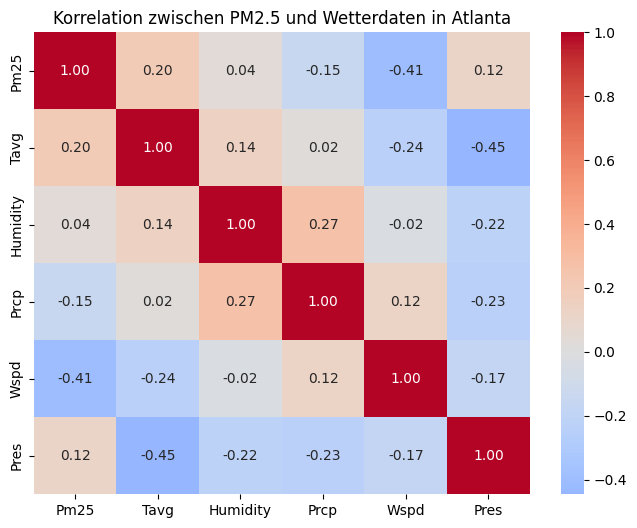

In [7]:
# Berechnung der Korrelationsmatrix
correlation_matrix = df_atlanta_pm25[['Pm25', 'Tavg', 'Humidity', 'Prcp', 'Wspd', 'Pres']].corr()

# Visualisierung der Korrelationsmatrix mit 'center=0'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Korrelation zwischen PM2.5 und Wetterdaten in Atlanta')
plt.show()


Die negative Korrelation mit der Windgeschwindigkeit ist die stärkste. Das bedeutet, dass in Zeiten mit wenig Wind die PM2.5-Werte tendenziell höher sind, was darauf hindeutet, dass Wind eine wichtige Rolle bei der Verteilung und Dispersion von Feinstaub spielt. Dies ist zu erwarten, da Wind dazu beiträgt, Luftschadstoffe zu vertreiben, während ruhiges Wetter (wenig Wind) zu einer Ansammlung von Schadstoffen führen kann.

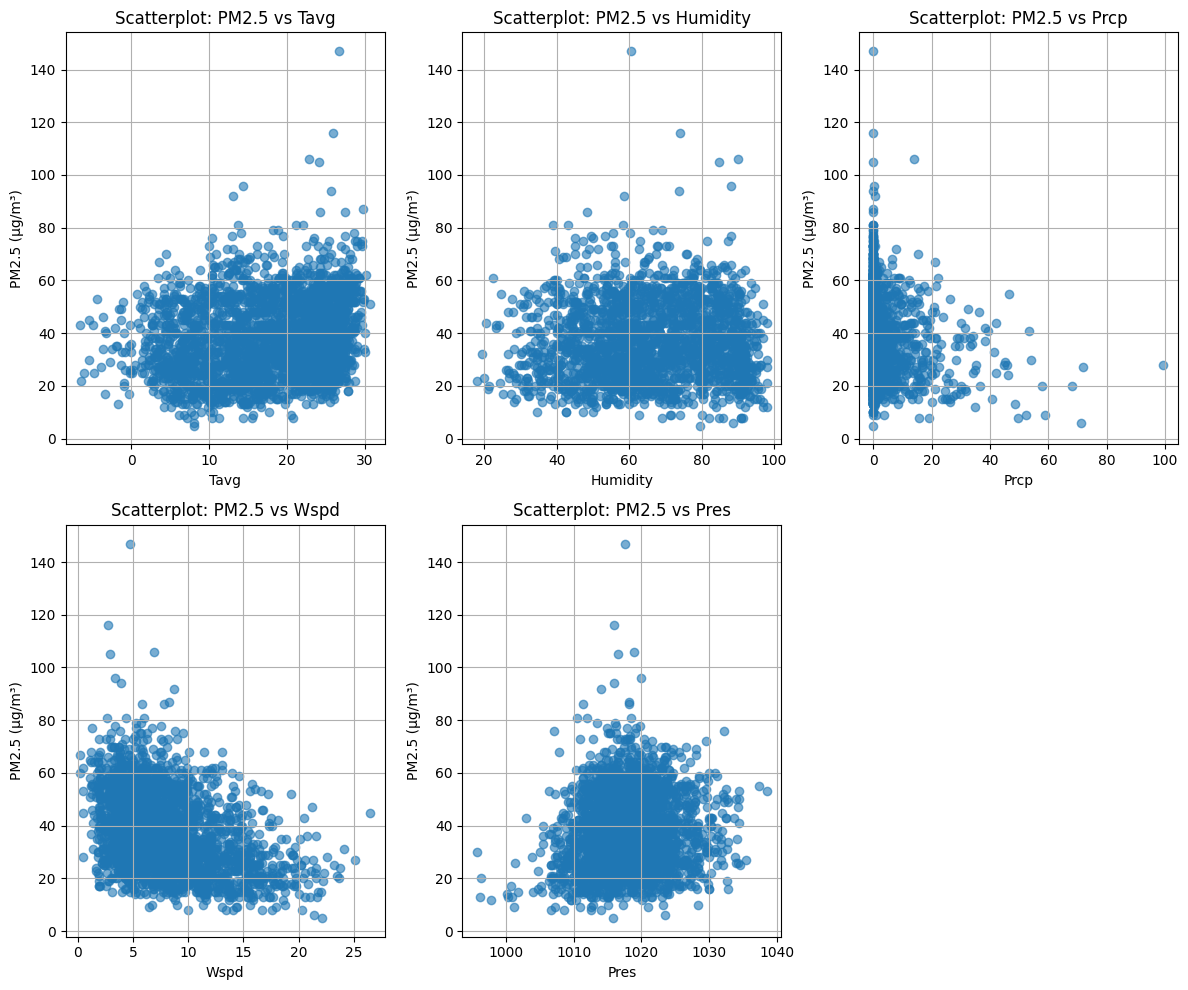

In [8]:
# Erstelle Scatterplots für jede Wettervariable im Vergleich zu PM2.5
variables = ['Tavg', 'Humidity', 'Prcp', 'Wspd', 'Pres']
plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)  # 2 Zeilen, 3 Spalten
    plt.scatter(df_atlanta_pm25[var], df_atlanta_pm25['Pm25'], alpha=0.6)
    plt.title(f'Scatterplot: PM2.5 vs {var}')
    plt.xlabel(var)
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True)

plt.tight_layout();


Sagt mir jetzt nicht so viel.

Wir machen jetzt mal eine multiple lineare Regression (also mit mehreren Variablen) und schauen, was da rauskommt.

Aber dazu müssen wir erst die NaN-Werte behandeln.

Möglichkeiten:
Wir haben Zeitreihen, also könnten wir vom Vortag aus imputieren.
Wir können aber auch Mittelwerte nehmen. Und das halte ich hier für sinnvoll.

In [9]:
# Inputiere NaN-Werte mit dem Median der jeweiligen Spalte
df_atlanta_pm25.fillna(df_atlanta_pm25.median(), inplace=True)

# Überprüfung, ob NaN-Werte noch vorhanden sind
print(df_atlanta_pm25.isna().sum())


Year        0
Month       0
Day         0
Pm25        0
Tavg        0
Humidity    0
Prcp        0
Wspd        0
Pres        0
dtype: int64


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/29420227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25.fillna(df_atlanta_pm25.median(), inplace=True)


In [10]:
from sklearn.linear_model import LinearRegression

# Definiere die unabhängigen Variablen (Wetterdaten)
X = df_atlanta_pm25[['Tavg', 'Humidity', 'Prcp', 'Wspd', 'Pres']]

# Definiere die abhängige Variable (PM2.5)
y = df_atlanta_pm25['Pm25']

# Lineares Regressionsmodell erstellen und trainieren
model = LinearRegression()
model.fit(X, y)

# Ergebnisse anzeigen
print('Koeffizienten:', model.coef_)
print('Intercept:', model.intercept_)


Koeffizienten: [ 0.32693995  0.04140881 -0.16135263 -1.16442665  0.35856924]
Intercept: -326.12422126449496


In [11]:
# Berechnung des Bestimmtheitsmaßes (R²)
r_squared = model.score(X, y)

# Ausgabe des R²-Werts
print(f'Bestimmtheitsmaß (R²): {r_squared:.4f}')


Bestimmtheitsmaß (R²): 0.1913


Der R²-Wert ist recht niedrig. Das wundert mich nicht, da wir auch die Wettervariablen einbezogen haben, die kaum eine (lineare) Korrelation mit PM2.5 aufweisen. Wir wiederholen jetzt mal die Regressionsanalyse ohne die Variable "Humidity" und schauen, ob das den R²-Wert wverbessert. Wenn ja, würde das heißen, dass Humidity störendes Rauschen verursacht.

In [12]:
# Entferne 'Humidity' aus den unabhängigen Variablen
X_new = df_atlanta_pm25[['Tavg', 'Prcp', 'Wspd', 'Pres']]

# Neues Modell ohne 'Humidity' trainieren
model_new = LinearRegression()
model_new.fit(X_new, y)

# Berechnung des neuen Bestimmtheitsmaßes (R²)
r_squared_new = model_new.score(X_new, y)

# Ausgabe des neuen R²-Werts
print(f'Neues Bestimmtheitsmaß (R²) ohne Luftfeuchtigkeit: {r_squared_new:.4f}')


Neues Bestimmtheitsmaß (R²) ohne Luftfeuchtigkeit: 0.1896


Ohne Humidity ist R² so gut wie gleich. Der Ansatz lohnt sich also nicht.

Nächstes Experiment: Polynomiale Regression (also quadrierte oder kubische Werte); vielleicht snd die Beziehungen ja nicht linear. Würde mich aber auch wundern, wenn das was bringen würde. Wir werden sehen.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definiere die unabhängigen Variablen (Wetterdaten)
X = df_atlanta_pm25[['Tavg', 'Prcp', 'Wspd', 'Pres']]

# Transformation der Daten in polynomiale Features (z. B. quadratische Terme)
poly = PolynomialFeatures(degree=3)  # degree=2 für quadratische Terme
X_poly = poly.fit_transform(X)

# Teilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des Modells
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

# Berechnung des R²-Werts für das Modell
r_squared_poly = model_poly.score(X_test, y_test)

# Ausgabe des R²-Werts
print(f'Bestimmtheitsmaß (R²) der polynomialen Regression: {r_squared_poly:.4f}')


Bestimmtheitsmaß (R²) der polynomialen Regression: 0.1987


Bringt nichts, weder quadratisch (degree=2) noch kubisch (degree=3)

Vielleicht Feature Engineering??

In [17]:
# Feature 1: Temperatur * Luftfeuchtigkeit
df_atlanta_pm25['Temp_Humidity'] = df_atlanta_pm25['Tavg'] * df_atlanta_pm25['Humidity']

# Feature 2: Monat als kategorisches Feature
df_atlanta_pm25['Month'] = df_atlanta_pm25['Month'].astype(str)

# Feature 3: Windgeschwindigkeit * Niederschlag
df_atlanta_pm25['Wind_Precip'] = df_atlanta_pm25['Wspd'] * df_atlanta_pm25['Prcp']

# Überprüfung der neuen Features
print(df_atlanta_pm25[['Temp_Humidity', 'Month', 'Wind_Precip']].head())


       Temp_Humidity Month  Wind_Precip
69068        1211.75    12         0.00
69069        1211.75    12         0.00
69070        1211.75    12         0.00
69071         366.80     1         3.24
69072         491.25     1         0.00


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/2564054105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Temp_Humidity'] = df_atlanta_pm25['Tavg'] * df_atlanta_pm25['Humidity']
/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/2564054105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Month'] = df_atlanta_pm25['Month'].astype(str)
/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/2564054105.py:8: SettingWithCopyWarnin

In [18]:
# Feature 1: Temperatur * Luftfeuchtigkeit
df_atlanta_pm25['Temp_Humidity'] = df_atlanta_pm25['Tavg'] * df_atlanta_pm25['Humidity']

# Feature 2: Monat als kategoriales Feature (wird als numerischer Wert verwendet)
df_atlanta_pm25['Month'] = df_atlanta_pm25['Month'].astype(str)

# Feature 3: Windgeschwindigkeit * Niederschlag
df_atlanta_pm25['Wind_Precip'] = df_atlanta_pm25['Wspd'] * df_atlanta_pm25['Prcp']

# Auswahl der unabhängigen Variablen (inklusive der neuen Features)
X_new = df_atlanta_pm25[['Tavg', 'Humidity', 'Prcp', 'Wspd', 'Pres', 'Temp_Humidity', 'Wind_Precip', 'Month']]

# Umwandlung des Monats in numerische Werte (wichtig für die lineare Regression)
X_new = pd.get_dummies(X_new, drop_first=True)

# Definiere die abhängige Variable (PM2.5)
y = df_atlanta_pm25['Pm25']

# Aufteilen der Daten in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Lineares Regressionsmodell erstellen und trainieren
model_new_features = LinearRegression()
model_new_features.fit(X_train, y_train)

# Berechnung des Bestimmtheitsmaßes (R²) für das Modell mit den neuen Features
r_squared_new_features = model_new_features.score(X_test, y_test)

# Ausgabe des R²-Werts für das neue Modell
print(f'Bestimmtheitsmaß (R²) mit den neuen Features: {r_squared_new_features:.4f}')


Bestimmtheitsmaß (R²) mit den neuen Features: 0.2444


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/1194440434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Temp_Humidity'] = df_atlanta_pm25['Tavg'] * df_atlanta_pm25['Humidity']
/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/1194440434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Month'] = df_atlanta_pm25['Month'].astype(str)
/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/1194440434.py:8: SettingWithCopyWarnin

Schon bisschen besserer Wert, aber noch deutlich Luft nach oben.

Was wäre mit Skalieren?

Erst mal die originalen Features:

In [19]:
from sklearn.preprocessing import StandardScaler

# Skalieren der unabhängigen Variablen
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Trainieren des Modells mit skalierten Daten
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_train)

# Berechnung des Bestimmtheitsmaßes (R²) für das Modell mit skalierten Daten
r_squared_scaled = model_scaled.score(scaler.transform(X_test), y_test)

# Ausgabe des R²-Werts für das Modell mit skalierten Daten
print(f'Bestimmtheitsmaß (R²) mit skalierten Features: {r_squared_scaled:.4f}')


Bestimmtheitsmaß (R²) mit skalierten Features: 0.2444


Kein Unterschied.

Skaliertes Modell mit den neuen Features:

In [20]:
# Auswahl der unabhängigen Variablen (inklusive der neuen Features)
X_new = df_atlanta_pm25[['Tavg', 'Humidity', 'Prcp', 'Wspd', 'Pres', 'Temp_Humidity', 'Wind_Precip', 'Month']]

# Umwandlung des Monats in numerische Werte (wichtig für die lineare Regression)
X_new = pd.get_dummies(X_new, drop_first=True)

# Skalierung der Features (einschließlich der neuen Features)
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

# Aufteilen der Daten in Trainings- und Testdaten
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_scaled_new, y, test_size=0.2, random_state=42)

# Trainieren des Modells mit skalierten Daten
model_scaled_new = LinearRegression()
model_scaled_new.fit(X_train_new, y_train_new)

# Berechnung des Bestimmtheitsmaßes (R²) für das Modell mit skalierten und neuen Features
r_squared_scaled_new = model_scaled_new.score(X_test_new, y_test_new)

# Ausgabe des R²-Werts für das Modell mit skalierten und neuen Features
print(f'Bestimmtheitsmaß (R²) mit skalierten und neuen Features: {r_squared_scaled_new:.4f}')


Bestimmtheitsmaß (R²) mit skalierten und neuen Features: 0.2444


So hat das alles keine sinnvolle Richtung. Wir versuchen jetzt erst mal mit LOWESS zu ermitteln, ob die zusammenhänge zwischen PM2.5 und den einzelnen Wettervariablen überhaupt linear sind:

/Users/mareikekeller/air_quality/.venv/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


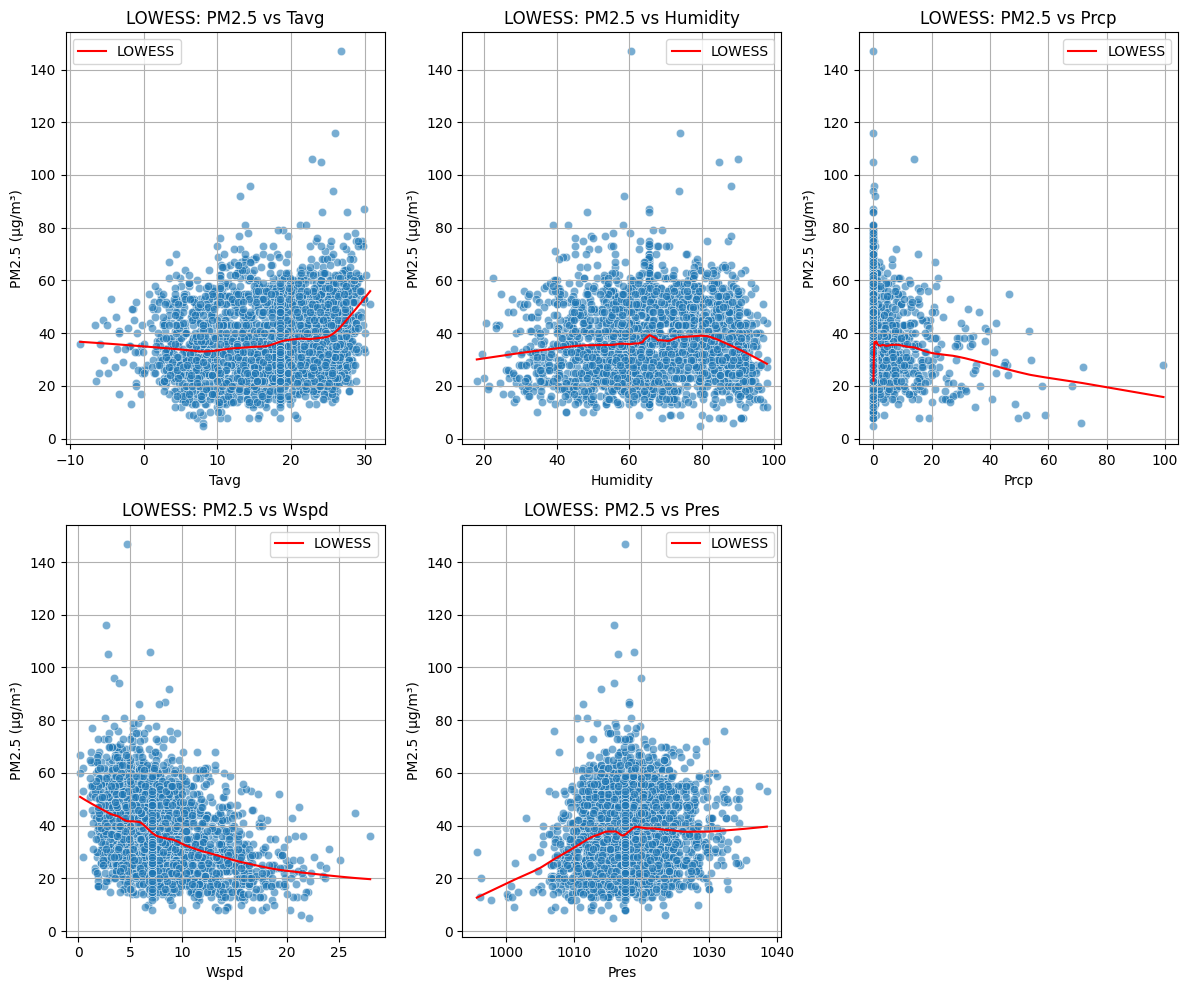

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Liste der Variablen für die Analyse
variables = ['Tavg', 'Humidity', 'Prcp', 'Wspd', 'Pres']

# Erstelle Scatterplots mit LOWESS-Glättung
plt.figure(figsize=(12, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)  # 2 Zeilen, 3 Spalten
    sns.scatterplot(x=df_atlanta_pm25[var], y=df_atlanta_pm25['Pm25'], alpha=0.6)
    
    # LOWESS-Glättung anwenden
    lowess_result = lowess(df_atlanta_pm25['Pm25'], df_atlanta_pm25[var], frac=0.3)
    plt.plot(lowess_result[:, 0], lowess_result[:, 1], color='red', label='LOWESS')
    
    plt.title(f'LOWESS: PM2.5 vs {var}')
    plt.xlabel(var)
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True)
    plt.legend()

plt.tight_layout();


Deutlich: Die Beziehungen sind nicht linear.

Also weiter mit dem Feature Engineering.

Zuerst die Temperatur: Steiler anstieg erst ab ca. 26 Grad Celsius. Also polynomielle Transfomation, quadratisch und kubisch.

In [22]:
# Transformation der Temperatur in quadratische und kubische Terme
df_atlanta_pm25['Tavg_squared'] = df_atlanta_pm25['Tavg'] ** 2
df_atlanta_pm25['Tavg_cubed'] = df_atlanta_pm25['Tavg'] ** 3

# Auswahl der unabhängigen Variablen (inklusive der transformierten Temperatur)
X_transformed = df_atlanta_pm25[['Tavg', 'Tavg_squared', 'Tavg_cubed', 'Humidity', 'Prcp', 'Wspd', 'Pres', 'Temp_Humidity', 'Wind_Precip', 'Month']]

# Umwandlung des Monats in numerische Werte (wichtig für die lineare Regression)
X_transformed = pd.get_dummies(X_transformed, drop_first=True)

# Skalierung der Features
scaler = StandardScaler()
X_scaled_transformed = scaler.fit_transform(X_transformed)

# Aufteilen der Daten in Trainings- und Testdaten
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_scaled_transformed, y, test_size=0.2, random_state=42)

# Lineares Regressionsmodell erstellen und trainieren
model_transformed = LinearRegression()
model_transformed.fit(X_train_transformed, y_train_transformed)

# Berechnung des Bestimmtheitsmaßes (R²) für das Modell mit transformierter Temperatur
r_squared_transformed = model_transformed.score(X_test_transformed, y_test_transformed)

# Ausgabe des R²-Werts für das Modell mit transformierter Temperatur
print(f'Bestimmtheitsmaß (R²) mit transformierter Temperatur: {r_squared_transformed:.4f}')


Bestimmtheitsmaß (R²) mit transformierter Temperatur: 0.2697


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/2034513829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Tavg_squared'] = df_atlanta_pm25['Tavg'] ** 2
/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/2034513829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Tavg_cubed'] = df_atlanta_pm25['Tavg'] ** 3


Weiter mit Luftfeuchtigkeit: Schwacher Anstieg bis 80% Luftfeuchtigkeit, dann steilerer Abfall ab 80%.

Also: Aufspalten der Wertebereiche in zwei getrennte Features.

Das erste Feature (Humidity_below80) enthält alle Werte bis 80%
Das zweite Feature (Humidity_above80) enthält NICHT alle Werte über 80%, sondern die Anzahl an %, die über 80 hinausgehen. Damit wird dann (hoffentlich!) der steile Rückgang im PM2.5-Gehalt ab 80% Luftfeuchtigkeit erfasst.
Beispiel:

Humidity = 86.3%

Humidity_below80 = 80.0

Humidity_above80 = 6.3

In [25]:
# Erstellen von piecewise Features für die Luftfeuchtigkeit
df_atlanta_pm25['Humidity_below80'] = df_atlanta_pm25['Humidity'].apply(lambda x: min(x, 80))
df_atlanta_pm25['Humidity_above80'] = df_atlanta_pm25['Humidity'].apply(lambda x: max(x - 80, 0))

# Überprüfung der neuen Features
print(df_atlanta_pm25[['Humidity', 'Humidity_below80', 'Humidity_above80']].sample(20))


       Humidity  Humidity_below80  Humidity_above80
71609      45.1              45.1               0.0
70534      42.4              42.4               0.0
71163      86.7              80.0               6.7
69556      65.5              65.5               0.0
69313      65.5              65.5               0.0
71401      78.0              78.0               0.0
70731      74.7              74.7               0.0
71557      50.9              50.9               0.0
71356      72.5              72.5               0.0
69239      65.5              65.5               0.0
70188      92.0              80.0              12.0
69851      54.9              54.9               0.0
69262      65.5              65.5               0.0
71436      85.7              80.0               5.7
70038      57.2              57.2               0.0
69586      65.5              65.5               0.0
71122      56.5              56.5               0.0
71798      43.3              43.3               0.0
69983      6

/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/2028186074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Humidity_below80'] = df_atlanta_pm25['Humidity'].apply(lambda x: min(x, 80))
/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/2028186074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Humidity_above80'] = df_atlanta_pm25['Humidity'].apply(lambda x: max(x - 80, 0))


In [26]:
# Wir verwenden jetzt einen erweiterten Satz von unabhängigen Variablen:
# - Temperatur und ihre transformierten Varianten
# - Die neuen Humidity-Features
# - Prcp, Wspd, Pres, Temp_Humidity, Wind_Precip
# - Month (wird später in Dummy-Variablen umgewandelt)

X_enhanced = df_atlanta_pm25[['Tavg', 'Tavg_squared', 'Tavg_cubed',
                              'Humidity_below80', 'Humidity_above80',
                              'Prcp', 'Wspd', 'Pres',
                              'Temp_Humidity', 'Wind_Precip', 'Month']]

# Umwandlung des Monats in numerische Dummy-Variablen
X_enhanced = pd.get_dummies(X_enhanced, drop_first=True)

# Definiere die abhängige Variable
y = df_atlanta_pm25['Pm25']

# Skalieren der Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_enhanced = scaler.fit_transform(X_enhanced)

# Aufteilen in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(X_scaled_enhanced, y, test_size=0.2, random_state=42)

# Trainiere das lineare Regressionsmodell mit dem erweiterten Feature-Set
from sklearn.linear_model import LinearRegression
model_enhanced = LinearRegression()
model_enhanced.fit(X_train_enh, y_train_enh)

# Berechne das Bestimmtheitsmaß (R²)
r_squared_enhanced = model_enhanced.score(X_test_enh, y_test_enh)
print(f'Bestimmtheitsmaß (R²) mit den neuen Humidity-Features: {r_squared_enhanced:.4f}')


Bestimmtheitsmaß (R²) mit den neuen Humidity-Features: 0.2759


Niederschlag (Prcp): Steiler Anstieg bei 0. Nicht gut sichtbar im Plot, was da wirklich Sache ist. Also Plot vergrößern, auf den relevanten Abschnitt schauen.

In [37]:
print(df_atlanta_pm25['Prcp'].describe())

count    2801.000000
mean        2.120993
std         6.801128
min         0.000000
25%         0.000000
50%         0.000000
75%         0.200000
max        99.500000
Name: Prcp, dtype: float64


Die Ausreißer für die Wetterdaten wurden auch noch nicht behandelt, scheint mir. Muss man noch machen, am besten in der EDA!

/Users/mareikekeller/air_quality/.venv/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


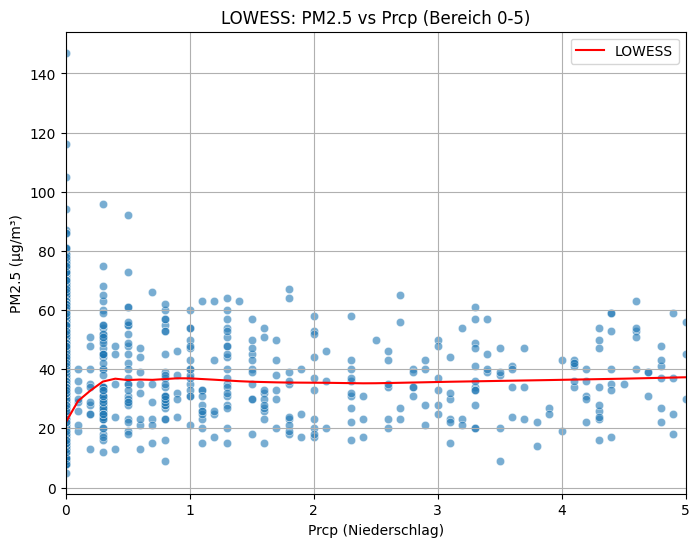

In [ ]:

from statsmodels.nonparametric.smoothers_lowess import lowess

# Wir filtern den DataFrame, um nur die Daten mit Prcp <= 5 zu betrachten
subset = df_atlanta_pm25[df_atlanta_pm25['Prcp'] <= 5]

plt.figure(figsize=(8,6))
sns.scatterplot(x=subset['Prcp'], y=subset['Pm25'], alpha=0.6)

# LOWESS-Glättung anwenden
lowess_result = lowess(subset['Pm25'], subset['Prcp'], frac=0.3)
plt.plot(lowess_result[:, 0], lowess_result[:, 1], color='red', label='LOWESS')

plt.xlim(0, 5)
plt.title("LOWESS: PM2.5 vs Prcp (Bereich 0-5)")
plt.xlabel("Prcp (Niederschlag)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True);


/Users/mareikekeller/air_quality/.venv/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


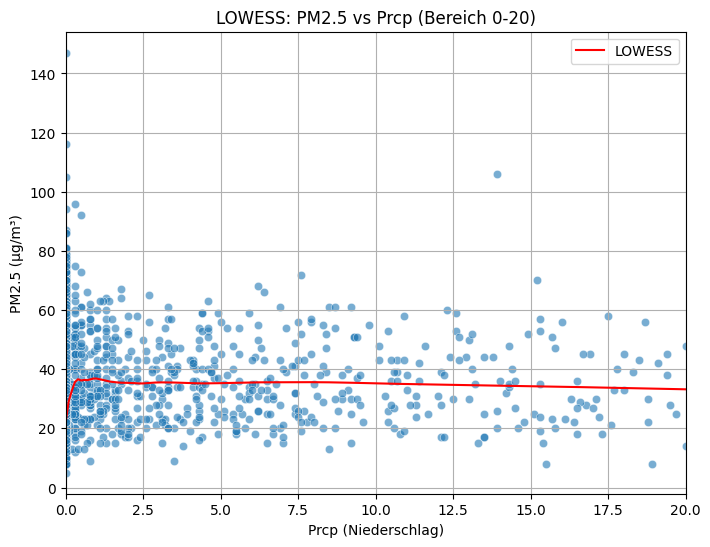

In [36]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Wir filtern den DataFrame, um nur die Daten mit Prcp <= 20 zu betrachten
subset = df_atlanta_pm25[df_atlanta_pm25['Prcp'] <= 20]

plt.figure(figsize=(8,6))
sns.scatterplot(x=subset['Prcp'], y=subset['Pm25'], alpha=0.6)

# LOWESS-Glättung anwenden
lowess_result = lowess(subset['Pm25'], subset['Prcp'], frac=0.3)
plt.plot(lowess_result[:, 0], lowess_result[:, 1], color='red', label='LOWESS')

plt.xlim(0, 20)
plt.title("LOWESS: PM2.5 vs Prcp (Bereich 0-20)")
plt.xlabel("Prcp (Niederschlag)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True);

Wir machen wieder zwei Features, eines unter 10mm Niederschlag und eines drüber.

In [39]:
# Erstellen von piecewise Features für Niederschlag (Prcp)
df_atlanta_pm25['Prcp_below10'] = df_atlanta_pm25['Prcp'].apply(lambda x: min(x, 10))
df_atlanta_pm25['Prcp_above10'] = df_atlanta_pm25['Prcp'].apply(lambda x: max(x - 10, 0))

# Überprüfung der neuen Features
print(df_atlanta_pm25[['Prcp', 'Prcp_below10', 'Prcp_above10']].sample(20))


       Prcp  Prcp_below10  Prcp_above10
70674   1.5           1.5           0.0
70131   0.0           0.0           0.0
70970   0.0           0.0           0.0
71372   0.0           0.0           0.0
70979  10.1          10.0           0.1
69426   0.0           0.0           0.0
71408   0.0           0.0           0.0
70932   5.8           5.8           0.0
71135   0.0           0.0           0.0
69605   0.0           0.0           0.0
71390   0.0           0.0           0.0
71312   0.0           0.0           0.0
70201   0.0           0.0           0.0
69593   0.0           0.0           0.0
70625   0.0           0.0           0.0
71649   4.3           4.3           0.0
70123   0.0           0.0           0.0
70122   0.0           0.0           0.0
70664   0.0           0.0           0.0
71162   0.0           0.0           0.0


/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/4134491356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Prcp_below10'] = df_atlanta_pm25['Prcp'].apply(lambda x: min(x, 10))
/var/folders/9l/_gqvrbsd14zb0w_nlgtngd_w0000gn/T/ipykernel_78368/4134491356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlanta_pm25['Prcp_above10'] = df_atlanta_pm25['Prcp'].apply(lambda x: max(x - 10, 0))


In [40]:
# Gesamtzahl der Datenpunkte für Niederschlag
total_prcp = df_atlanta_pm25['Prcp'].count()

# Anzahl der Datenpunkte, bei denen Prcp > 10 ist
prcp_above10_count = df_atlanta_pm25[df_atlanta_pm25['Prcp'] > 10].shape[0]

print(f"Gesamtanzahl der Datenpunkte für Prcp: {total_prcp}")
print(f"Anzahl der Datenpunkte mit Prcp über 10 mm: {prcp_above10_count}")


Gesamtanzahl der Datenpunkte für Prcp: 2801
Anzahl der Datenpunkte mit Prcp über 10 mm: 194


In [41]:
# Wir nehmen an, dass die neuen Niederschlags-Features bereits erstellt wurden:
# df_atlanta_pm25['Prcp_below10'] und df_atlanta_pm25['Prcp_above10'] sind vorhanden.

# Auswahl der unabhängigen Variablen, inklusive aller bisherigen und der neuen Niederschlags-Features:
X_features = df_atlanta_pm25[['Tavg', 'Tavg_squared', 'Tavg_cubed', 
                              'Humidity_below80', 'Humidity_above80', 
                              'Prcp_below10', 'Prcp_above10', 
                              'Wspd', 'Pres', 
                              'Temp_Humidity', 'Wind_Precip', 'Month']]

# Umwandlung des Monats in Dummy-Variablen
X_features = pd.get_dummies(X_features, drop_first=True)

# Zielvariable
y = df_atlanta_pm25['Pm25']

# Aufteilen der Daten in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Skalierung der Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Erstellen und Trainieren des linearen Regressionsmodells
from sklearn.linear_model import LinearRegression
model_with_prcp = LinearRegression()
model_with_prcp.fit(X_train_scaled, y_train)

# Berechnung des Bestimmtheitsmaßes (R²)
r_squared_with_prcp = model_with_prcp.score(X_test_scaled, y_test)
print(f'Bestimmtheitsmaß (R²) mit den neuen Niederschlags-Features: {r_squared_with_prcp:.4f}')


Bestimmtheitsmaß (R²) mit den neuen Niederschlags-Features: 0.2768


Das Feature Engineering bringt hier wenig für das R² - aber echt viel für mein Verständnis!

Es fehlen noch Wspd und Pres. Die mache ich morgen.

Notiz für morgen: Die Ausreißer in den Wetterdaten wurden entfernt. Der eine hohe Wert für Atlanta wird wohl ein ordentlicher Regen gewesen sein. Mal das Datum überprüfen.